In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from math import radians, cos, sin, asin, sqrt
import geopandas as gpd
import contextily as ctx
import folium
plt.style.use('ggplot')
#import geoplot as gplt
%matplotlib inline

# Loading data

In [2]:
df_202107 = pd.read_csv("D:/data/tripdata/202107-divvy-tripdata.csv")
df_202106 = pd.read_csv("D:/data/tripdata/202106-divvy-tripdata.csv")
df_202105 = pd.read_csv("D:/data/tripdata/202105-divvy-tripdata.csv")
df_202104 = pd.read_csv("D:/data/tripdata/202104-divvy-tripdata.csv")
df_202103 = pd.read_csv("D:/data/tripdata/202103-divvy-tripdata.csv")
df_202102 = pd.read_csv("D:/data/tripdata/202102-divvy-tripdata.csv")
df_202101 = pd.read_csv("D:/data/tripdata/202101-divvy-tripdata.csv")
df_202012 = pd.read_csv("D:/data/tripdata/202012-divvy-tripdata.csv")
df_202011 = pd.read_csv("D:/data/tripdata/202011-divvy-tripdata.csv")
df_202010 = pd.read_csv("D:/data/tripdata/202010-divvy-tripdata.csv")
df_202009 = pd.read_csv("D:/data/tripdata/202009-divvy-tripdata.csv")
df_202008 = pd.read_csv("D:/data/tripdata/202008-divvy-tripdata.csv")
df_202007 = pd.read_csv("D:/data/tripdata/202007-divvy-tripdata.csv")
df_202006 = pd.read_csv("D:/data/tripdata/202006-divvy-tripdata.csv")
df_202005 = pd.read_csv("D:/data/tripdata/202005-divvy-tripdata.csv")
df_202004 = pd.read_csv("D:/data/tripdata/202004-divvy-tripdata.csv")
df_total = [df_202107,df_202106,df_202105,df_202104,df_202103,df_202102,
             df_202101,df_202012,df_202011,df_202010,df_202009,df_202008,df_202007,df_202006,df_202005,df_202004]
df_2021 = [df_202107,df_202106,df_202105,df_202104,df_202103,df_202102,df_202101]
df_2020 = [df_202004,df_202005,df_202006,df_202007,df_202008,df_202009,df_202010,df_202011,df_202012]
df_2020_q2 = [df_202004,df_202005,df_202006]
df_2020_q3 = [df_202007,df_202008,df_202009]
df_2020_q4 =[df_202010,df_202011,df_202012]
df_2021_q1 = [df_202103,df_202102,df_202101]
df_2021_q2 = [df_202106,df_202105,df_202104]

# Check the consistancy of columns' name in tables

In [3]:
def all_equal(iterator):
    iterator = iter(iterator)
    try:
        first = next(iterator)
    except StopIteration:
        return True
    return all(first == x for x in iterator)
df_total_columns = []
for df in df_total:
    temp_name = df.columns.to_list()
    temp_name.sort()
    df_total_columns.append(temp_name)
all_equal(df_total_columns)

True

# Data combination

In [4]:
df = pd.concat(df_total)

In [5]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,0A1B623926EF4E16,docked_bike,2021-07-02 14:44:36,2021-07-02 15:19:58,Michigan Ave & Washington St,13001,Halsted St & North Branch St,KA1504000117,41.883984,-87.624684,41.899368,-87.648480,casual
1,B2D5583A5A5E76EE,classic_bike,2021-07-07 16:57:42,2021-07-07 17:16:09,California Ave & Cortez St,17660,Wood St & Hubbard St,13432,41.900363,-87.696704,41.889899,-87.671473,casual
2,6F264597DDBF427A,classic_bike,2021-07-25 11:30:55,2021-07-25 11:48:45,Wabash Ave & 16th St,SL-012,Rush St & Hubbard St,KA1503000044,41.860384,-87.625813,41.890173,-87.626185,member
3,379B58EAB20E8AA5,classic_bike,2021-07-08 22:08:30,2021-07-08 22:23:32,California Ave & Cortez St,17660,Carpenter St & Huron St,13196,41.900363,-87.696704,41.894556,-87.653449,member
4,6615C1E4EB08E8FB,electric_bike,2021-07-28 16:08:06,2021-07-28 16:27:09,California Ave & Cortez St,17660,Elizabeth (May) St & Fulton St,13197,41.900350,-87.696682,41.886593,-87.658387,casual


# Data Engineering

In [6]:
def haversine(lon1, lat1, lon2, lat2): 
        """
        Calculate the great circle distance between two points 
        on the earth (specified in decimal degrees)
        """
        lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
        # haversine公式
        dlon = lon2 - lon1 
        dlat = lat2 - lat1 
        a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
        c = 2 * asin(sqrt(a)) 
        r = 6371 # 地球平均半径，单位为公里
        return c * r * 1000

In [7]:
def data_engineering_process(df):
    df_ride_time = pd.to_datetime(df['ended_at']) - pd.to_datetime(df['started_at'])
    df['day_of_week'] = pd.to_datetime(df['started_at']).dt.dayofweek
    df['hour_start'] = pd.to_datetime(df['started_at']).dt.hour
    df['ride_time_hour'] = df_ride_time.dt.seconds/3600
    df['ride_distance'] = df.apply(lambda x: haversine(x['start_lng'],x['start_lat'],x['end_lng'],x['end_lat']),axis = 1)
    df['hourly_ride_distance'] = df['ride_distance']/df['ride_time_hour']
#df['day_of_week'].value_counts(normalize = True).values
#n_bin = 20
#plt.hist(df['hour_ride_length'],range = (0,3),bins= n_bin,density=True)

In [8]:
data_engineering_process(df)

In [9]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,day_of_week,hour_start,ride_time_hour,ride_distance,hourly_ride_distance
0,0A1B623926EF4E16,docked_bike,2021-07-02 14:44:36,2021-07-02 15:19:58,Michigan Ave & Washington St,13001,Halsted St & North Branch St,KA1504000117,41.883984,-87.624684,41.899368,-87.648480,casual,4,14,0.589444,2608.821936,4425.899608
1,B2D5583A5A5E76EE,classic_bike,2021-07-07 16:57:42,2021-07-07 17:16:09,California Ave & Cortez St,17660,Wood St & Hubbard St,13432,41.900363,-87.696704,41.889899,-87.671473,casual,2,16,0.307500,2390.631779,7774.412288
2,6F264597DDBF427A,classic_bike,2021-07-25 11:30:55,2021-07-25 11:48:45,Wabash Ave & 16th St,SL-012,Rush St & Hubbard St,KA1503000044,41.860384,-87.625813,41.890173,-87.626185,member,6,11,0.297222,3312.528863,11144.956921
3,379B58EAB20E8AA5,classic_bike,2021-07-08 22:08:30,2021-07-08 22:23:32,California Ave & Cortez St,17660,Carpenter St & Huron St,13196,41.900363,-87.696704,41.894556,-87.653449,member,3,22,0.250556,3637.849284,14519.132396
4,6615C1E4EB08E8FB,electric_bike,2021-07-28 16:08:06,2021-07-28 16:27:09,California Ave & Cortez St,17660,Elizabeth (May) St & Fulton St,13197,41.900350,-87.696682,41.886593,-87.658387,casual,2,16,0.317500,3519.571400,11085.264251


# Data Cleaning

## Checking missing values

In [10]:
df.isnull().sum()
df.isna().sum()

ride_id                      0
rideable_type                0
started_at                   0
ended_at                     0
start_station_name      369331
start_station_id        369956
end_station_name        409155
end_station_id          409616
start_lat                    0
start_lng                    0
end_lat                   6905
end_lng                   6905
member_casual                0
day_of_week                  0
hour_start                   0
ride_time_hour               0
ride_distance             6905
hourly_ride_distance      7011
dtype: int64

## Checking catagorical varibles

In [11]:
df['rideable_type'].value_counts()

docked_bike      2735950
classic_bike     1785514
electric_bike    1389152
Name: rideable_type, dtype: int64

In [12]:
df['member_casual'].value_counts()

member    3273986
casual    2636630
Name: member_casual, dtype: int64

In [13]:
def data_cleaning_process(df):
    df.drop_duplicates()
    df = df[df['end_lat'].notna()]
    df = df[df['end_lng'].notna()]
    df = df[df['hourly_ride_distance'].notna()]
    df = df[df['ride_time_hour']>0]#get rid of unrasonable records
    return df

In [14]:
df_clean = data_cleaning_process(df)

In [15]:
df_clean.isna().sum()

ride_id                      0
rideable_type                0
started_at                   0
ended_at                     0
start_station_name      369327
start_station_id        369952
end_station_name        402020
end_station_id          402481
start_lat                    0
start_lng                    0
end_lat                      0
end_lng                      0
member_casual                0
day_of_week                  0
hour_start                   0
ride_time_hour               0
ride_distance                0
hourly_ride_distance         0
dtype: int64

In order to analyse the difference between casual members and regular members. We need to divide the data into two groups

In [16]:
df_clean_member = df_clean[df_clean['member_casual']=='member']
df_clean_casual = df_clean[df_clean['member_casual']=='casual']

In [17]:
df_clean_member['start_station_name'].value_counts().head(10)

Clark St & Elm St             30815
Wells St & Concord Ln         25261
Kingsbury St & Kinzie St      23492
Dearborn St & Erie St         23250
Broadway & Barry Ave          23122
Wells St & Elm St             23003
St. Clair St & Erie St        22758
Theater on the Lake           22374
Wells St & Huron St           21813
Lake Shore Dr & North Blvd    21624
Name: start_station_name, dtype: int64

In [31]:
top_start_station_member = df_clean_member.groupby('start_station_name').agg({'start_station_name':'count','start_lat':'mean','start_lng':'mean'}).rename(columns={'start_station_name':'num_start_station_name'}).sort_values(by=['num_start_station_name'],ascending=False).head(100)

In [57]:
df_clean_casual['start_station_name'].value_counts().head(10)

Streeter Dr & Grand Ave       62785
Lake Shore Dr & Monroe St     38107
Millennium Park               37113
Michigan Ave & Oak St         29759
Lake Shore Dr & North Blvd    27438
Theater on the Lake           26628
Indiana Ave & Roosevelt Rd    22605
Shedd Aquarium                21493
Clark St & Elm St             20077
Michigan Ave & Lake St        19711
Name: start_station_name, dtype: int64

In [37]:
top_start_station_casual = df_clean_casual.groupby('start_station_name').agg({'start_station_name':'count','start_lat':'mean','start_lng':'mean'}).rename(columns={'start_station_name':'num_start_station_name'}).sort_values(by=['num_start_station_name'],ascending=False).head(100)

In [19]:
df_clean_member['rideable_type'].value_counts()

docked_bike      1439506
classic_bike     1089316
electric_bike     741776
Name: rideable_type, dtype: int64

In [20]:
df_clean_casual['rideable_type'].value_counts()

docked_bike      1292005
classic_bike      693353
electric_bike     647189
Name: rideable_type, dtype: int64

# Single feature analysis

## rideable_type

([<matplotlib.patches.Wedge at 0x17a918c7d90>,
 [Text(0.20565974079870392, 1.0806035679260966, 'docked_bike'),
  Text(-0.8620611926761698, -0.6832645900979648, 'classic_bike'),
  Text(0.8323903957598412, -0.7191148928000137, 'electric_bike')],
 [Text(0.11217804043565667, 0.589420127959689, '44.0%'),
  Text(-0.47021519600518347, -0.3726897764170717, '33.3%'),
  Text(0.45403112495991327, -0.3922444869818256, '22.7%')])

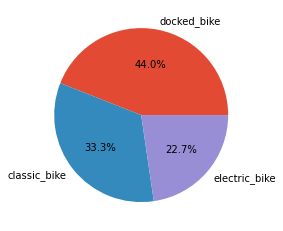

In [21]:
df_clean_member_rideable = df_clean_member['rideable_type'].value_counts()
labels_member_rideable = ['docked_bike','classic_bike','electric_bike']
plt.pie(df_clean_member_rideable,labels=labels_member_rideable,autopct='%1.1f%%')

([<matplotlib.patches.Wedge at 0x17a9199d100>,
 [Text(0.03185285608175928, 1.0995387194453112, 'docked_bike'),
  Text(-0.7900832487613594, -0.7653551202067547, 'classic_bike'),
  Text(0.7879127243713193, -0.767589433729885, 'electric_bike')],
 [Text(0.01737428513550506, 0.5997483924247152, '49.1%'),
  Text(-0.43095449932437785, -0.4174664292036843, '26.3%'),
  Text(0.42977057692981047, -0.4186851456708463, '24.6%')])

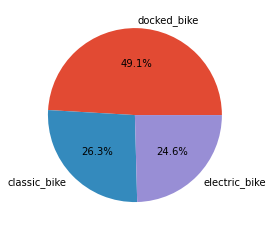

In [22]:
df_clean_casual_rideable = df_clean_casual['rideable_type'].value_counts()
labels_casual_rideable = ['docked_bike','classic_bike','electric_bike']
plt.pie(df_clean_casual_rideable,labels=labels_member_rideable,autopct='%1.1f%%')

There is tendency that regular members prefer classic bilkes than casual members

# Basic statistical analysis

## Numbers analysis

### Proportion of missing values

In [96]:
str_nan = 'start_station_id'
num_nan_end_station_name = df_clean[df_clean[str_nan].isna()==True].shape[0]
num_nan_end_station_name_member = df_clean_member[df_clean_member[str_nan].isna()==True].shape[0]
num_nan_end_station_name_casual = df_clean_casual[df_clean_casual[str_nan].isna()==True].shape[0]
num_nan_end_station_name_member/num_nan_end_station_name

0.4650277181241572

There is no big difference for missing values between casual and regular membership

### The number of rides comparison

Text(0, 0.5, 'Numerber of rides')

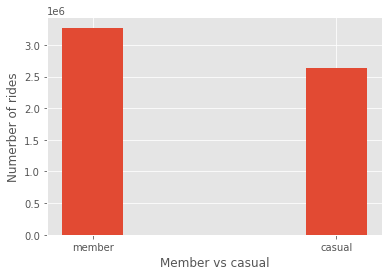

In [23]:
X_member_casual = ['member','casual']
y_nums_member_casual = [df_clean_member.shape[0],
                        df_clean_casual.shape[0]]
plt.bar(X_member_casual,y_nums_member_casual,width = 0.25)
plt.xlabel('Member vs casual')
plt.ylabel('Numerber of rides')

There is higher number of rides from regular members than casual riders, which is not surprising. Some of the rides may come from the same rider. They are not charged again within certain period of time. It is indicated that regular members use bikes as a transport more frequently in a day.

### The average speed comparison

Text(0, 0.5, 'Average hourly ride distance ')

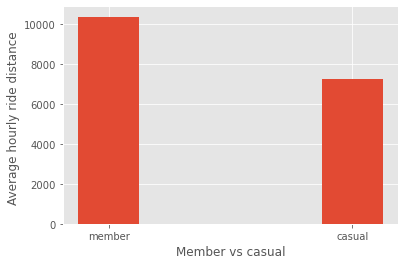

In [24]:
plt.Figure(figsize=(10,8))
y_speed_member_casual = [df_clean_member['hourly_ride_distance'].mean(),
                        df_clean_casual['hourly_ride_distance'].mean()]
plt.bar(X_member_casual,y_speed_member_casual,width = 0.25)
plt.xlabel('Member vs casual')
plt.ylabel('Average hourly ride distance ')

It is noticeble that the average speed of members is much higher than casual riders. Chances are that the distance for riders is calculated by the start and end of coordinates (by the latitude and longitude). Casual rides may exprince a curve-like course without a certain final destination, while the regular rider usually come with purposes of daily work or exercises so that their tracks can be straight forward. This can be confirmed by the riding duration.  

Text(0, 0.5, 'ride_time_hour')

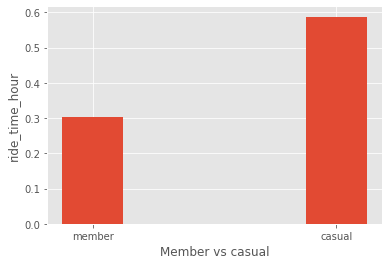

In [25]:
y_ride_time_member_casual = [df_clean_member['ride_time_hour'].mean(),
                        df_clean_casual['ride_time_hour'].mean()]
plt.bar(X_member_casual,y_ride_time_member_casual,width = 0.25)
plt.xlabel('Member vs casual')
plt.ylabel('ride_time_hour')

Casual rides always spend a lot time during the trip, but the distance between the start and the end can always be shorter than the regular members. It can be speculated that the tracks for the casual riders are not in a line or some addtional stops may be added in the trip. They may stay for a while during the trip like shopping or park excerses. 


## Mean value analysis of riding hours

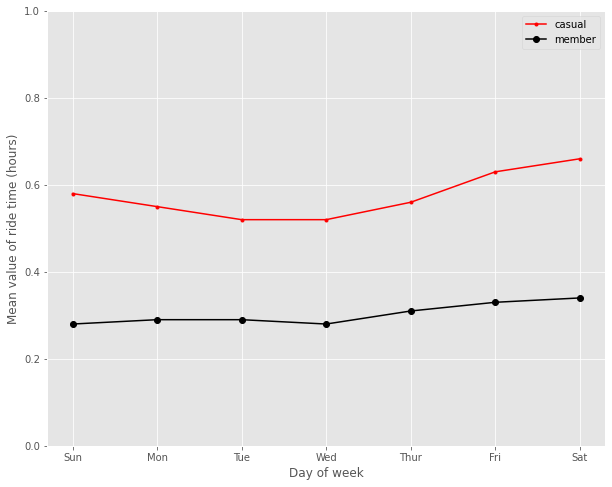

In [26]:
y_casual = []
for i in range(7):
    df_clean_casual_day = df_clean_casual[df_clean_casual['day_of_week']==i]
    mean_value = df_clean_casual_day['ride_time_hour'].mean()
    mean_value = round(mean_value,2)
    y_casual.append(mean_value)
    #print("Casual: mean value of day "+str(i)+": "+str(mean_value))



y_member = []
for i in range(7):
    df_clean_member_day = df_clean_member[df_clean_member['day_of_week']==i]
    mean_value = df_clean_member_day['ride_time_hour'].mean()
    mean_value = round(mean_value,2)
    y_member.append(mean_value)
    #print("Member: mean value of day "+str(i)+": "+str(mean_value))
X_day = ['Sun','Mon','Tue','Wed','Thur','Fri','Sat']
plt.figure(figsize=(10,8))
plt.plot(X_day,y_casual,'.r-',label="casual")
plt.plot(X_day,y_member,'-ok',label='member')
plt.legend()
plt.xlabel('Day of week')
plt.ylabel('Mean value of ride time (hours)')
plt.ylim((0,1))
plt.show()

Overall, there is an increasing demand in the weekend (Friday and Saturday). The increasing rate is higher for casual riders.

### Season comparisons

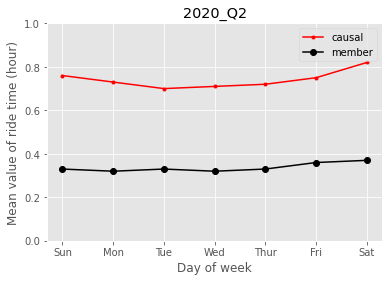

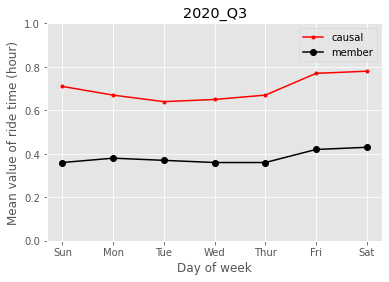

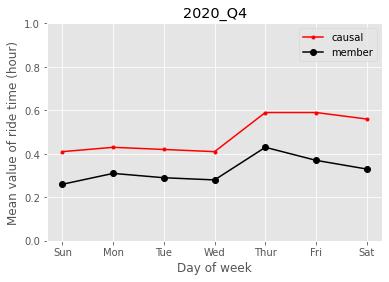

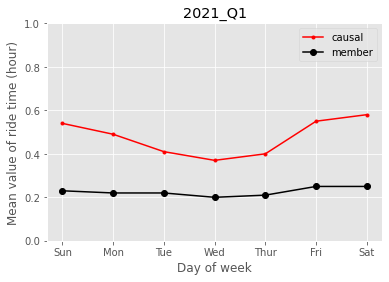

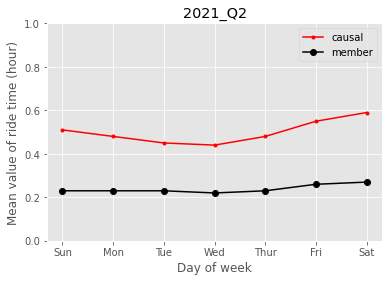

In [27]:
df_seasons = [df_2020_q2,df_2020_q3,df_2020_q4,df_2021_q1,df_2021_q2]
titles = {id(df_2020_q2):'2020_Q2',id(df_2020_q3):'2020_Q3',id(df_2020_q4):'2020_Q4',id(df_2021_q1):'2021_Q1',id(df_2021_q2):'2021_Q2'}
for df_season in df_seasons:
    df = pd.concat(df_season)
    data_engineering_process(df)
    df_clean = data_cleaning_process(df)
    y_casual = []
    for i in range(7):
        df_clean_casual = df_clean[df_clean['member_casual']=='casual']
        df_clean_casual_day = df_clean_casual[df_clean_casual['day_of_week']==i]
        mean_value = df_clean_casual_day['ride_time_hour'].mean()
        mean_value = round(mean_value,2)
        y_casual.append(mean_value)
        #print("Casual: mean value of day "+str(i)+": "+str(mean_value))



    y_member = []
    for i in range(7):
        df_clean_member = df_clean[df_clean['member_casual']=='member']
        df_clean_member_day = df_clean_member[df_clean_member['day_of_week']==i]
        mean_value = df_clean_member_day['ride_time_hour'].mean()
        mean_value = round(mean_value,2)
        y_member.append(mean_value)
        #print("Member: mean value of day "+str(i)+": "+str(mean_value))
    
    X_day = ['Sun','Mon','Tue','Wed','Thur','Fri','Sat']
    plt.plot(X_day,y_casual,'.r-',label="causal")
    plt.plot(X_day,y_member,'-ok',label='member')
    plt.legend()
    plt.xlabel('Day of week')
    plt.ylabel('Mean value of ride time (hour)')
    plt.ylim((0,1))
    plt.title(titles[id(df_season)])
    plt.show()

The ride time of regular members over the day of week is quit steady all year round. Fluctuations is more apparent for casual riders. There is a decreasing demand since Q4 of 2020 for both casual and member riders perhaps due to the restriction caused by pandemic.

However, mean value analysis is rough. To gain deep insigt we need to investigate other statistical varibles.

## Distribution analysis

Text(0, 0.5, 'Numbers of ride')

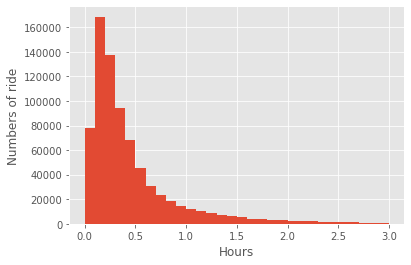

In [28]:
n_bin = 30
plt.hist(df_clean_casual['ride_time_hour'],range = (0,3),bins= n_bin)
plt.xlabel('Hours')
plt.ylabel('Numbers of ride')

Text(0, 0.5, 'Number of rides')

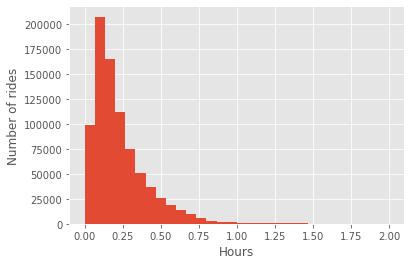

In [29]:
n_bin = 30
plt.hist(df_clean_member['ride_time_hour'],range = (0,2),bins= n_bin)
plt.xlabel('Hours')
plt.ylabel('Number of rides')

Casual riders have a wider range of riding hours (0 hr - 3 hrs) while regular members have a relatively concerntrated range (0 hr - 1.5 hrs).
It demonstrates regular members have a less varience of riding hours than causual riders. 

## Geometrical analysis

In [30]:
url = "D:\data\Boundaries - City\geo_export_787ab98f-a39d-4bec-accc-a3e7f43582c9.shp"
cities = gpd.read_file(url)
cities = cities.to_crs(epsg=3857)

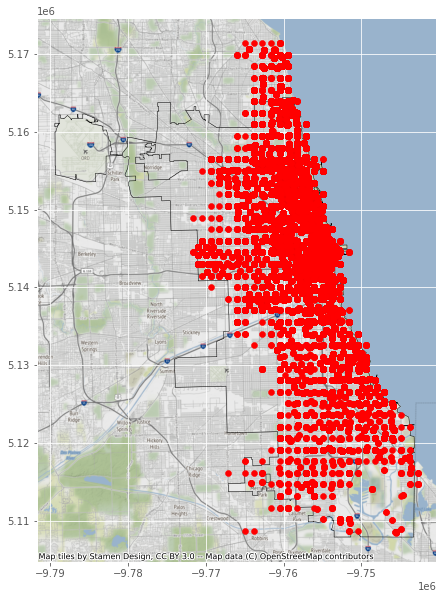

In [32]:
gdf = gpd.GeoDataFrame(
    df_clean_member, geometry=gpd.points_from_xy(df_clean_member.start_lng, df_clean_member.start_lat))
gdf = gdf.set_crs(epsg=4326)
gdf = gdf.to_crs(epsg=3857)
ax = cities.plot(figsize=(10, 10), color='none', edgecolor='black')
ax = gdf.plot(ax=ax,color='red')
ctx.add_basemap(ax,zoom=12)
#plt.show()

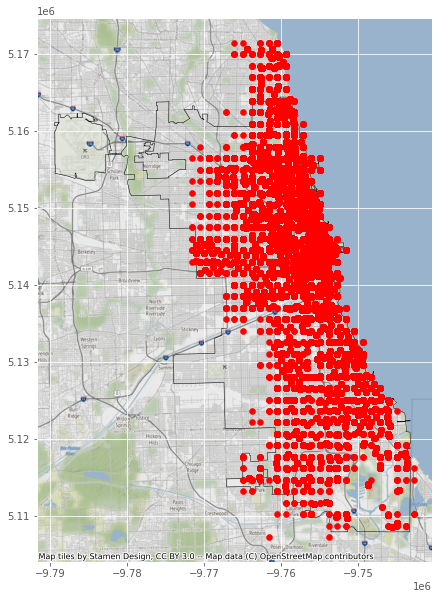

In [33]:
gdf = gpd.GeoDataFrame(
    df_clean_casual, geometry=gpd.points_from_xy(df_clean_casual.start_lng, df_clean_casual.start_lat))
gdf = gdf.set_crs(epsg=4326)
gdf = gdf.to_crs(epsg=3857)
ax = cities.plot(figsize=(10, 10), color='none', edgecolor='black')
ax = gdf.plot(ax=ax,color='red')
ctx.add_basemap(ax,zoom=12)

# Geo analysis with folium

In [53]:
center_coordinates = (41.902892,-87.631828)
epsilon = 0.002
#add restrications to coordinates
down_left_coordinate = (center_coordinates[0]-epsilon, center_coordinates[1]-epsilon)
up_right_coordinate = (center_coordinates[0]+epsilon, center_coordinates[0]+epsilon)
df_clean_member_restricted = df_clean_member[(down_left_coordinate[0]<df_clean_member['start_lat'])&(df_clean_member['start_lat']<up_right_coordinate[0])&(down_left_coordinate[1]<df_clean_member['start_lng'])&(df_clean_member['start_lng']<up_right_coordinate[1])]
# Define a map centered around Chicago
chicago_map_member = folium.Map(location=[df_clean_member_restricted['start_lat'].mean(),df_clean_member_restricted['start_lng'].mean()], zoom_start=15)
for index, location_info in df_clean_member_restricted.sample(50000).iterrows():
    folium.features.CircleMarker(
        [location_info['start_lat'], location_info['start_lng']],
        radius=1,
        color='red',
        fill=True,
#        popup=label,
        fill_color='darkred',
        fill_opacity=0.6
    ).add_to(chicago_map_member)    

In [54]:
df_clean_casual_restricted = df_clean_casual[(down_left_coordinate[0]<df_clean_casual['start_lat'])&(df_clean_casual['start_lat']<up_right_coordinate[0])&(down_left_coordinate[1]<df_clean_casual['start_lng'])&(df_clean_casual['start_lng']<up_right_coordinate[1])]
# Define a map centered around Chicago
chicago_map_casual = folium.Map(location=[df_clean_casual_restricted['start_lat'].mean(),df_clean_casual_restricted['start_lng'].mean()], zoom_start=12)
for index, location_info in df_clean_casual_restricted.sample(50000).iterrows():
    folium.features.CircleMarker(
        [location_info['start_lat'], location_info['start_lng']],
        radius=1,
        color='blue',
        fill=True,
#        popup=label,
        fill_color='darkred',
        fill_opacity=0.6
    ).add_to(chicago_map_member)  

## Geometrical distribution of top 100 favorite starting station 

In [61]:
top_start_station_map = folium.Map(location=[top_start_station_member['start_lat'].mean(),top_start_station_member['start_lng'].mean()], zoom_start=12)
for index, location_info in top_start_station_member.iterrows():
    folium.features.CircleMarker(
        [location_info['start_lat'], location_info['start_lng']],
        radius=location_info['num_start_station_name']/3000,
        color='red',
        fill=False,
        tooltip=str(location_info['num_start_station_name'])+' member',
        #fill_color='darkred',
        #fill_opacity=1,
        opacity=1
    ).add_to(top_start_station_map)
for index, location_info in top_start_station_casual.iterrows():
    folium.features.CircleMarker(
        [location_info['start_lat'], location_info['start_lng']],
        radius=location_info['num_start_station_name']/3000,
        color='blue',
        fill=False,
        tooltip=str(location_info['num_start_station_name'])+' casual',
        #fill_color='blue',
        #fill_opacity=0.1,
        opacity=1
    ).add_to(top_start_station_map)
top_start_station_map

The most top favorite starting stations of regular members are mainly located around commercial areas. Apart from those areas, the casual members are mainly distributed around recreational areas like public park, memorial, dock.